In [1]:
# numpy, matplotlib, seaborn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

import warnings;  warnings.filterwarnings('ignore')

# 数据概览

## 数据导入

In [2]:
# 导入数据并查看基本情况
titanic_df = sns.load_dataset("titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 缺失值查看

In [4]:
titanic_df.info()
print("\n" + "查看数据缺失情况".center(50,"="))
titanic_df.isnull().sum() # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB

=====================查看数据缺失情况=====================


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 变量选择

In [5]:
titanic_df = titanic_df.drop(['class', 'sex', 'adult_male', 'deck', 'embark_town','alive', 'alone'], axis=1)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,S,man
1,1,1,38.0,1,0,71.2833,C,woman
2,1,3,26.0,0,0,7.9250,S,woman
3,1,1,35.0,1,0,53.1000,S,woman
4,0,3,35.0,0,0,8.0500,S,man


# 探索性分析

## 是否存活：survived

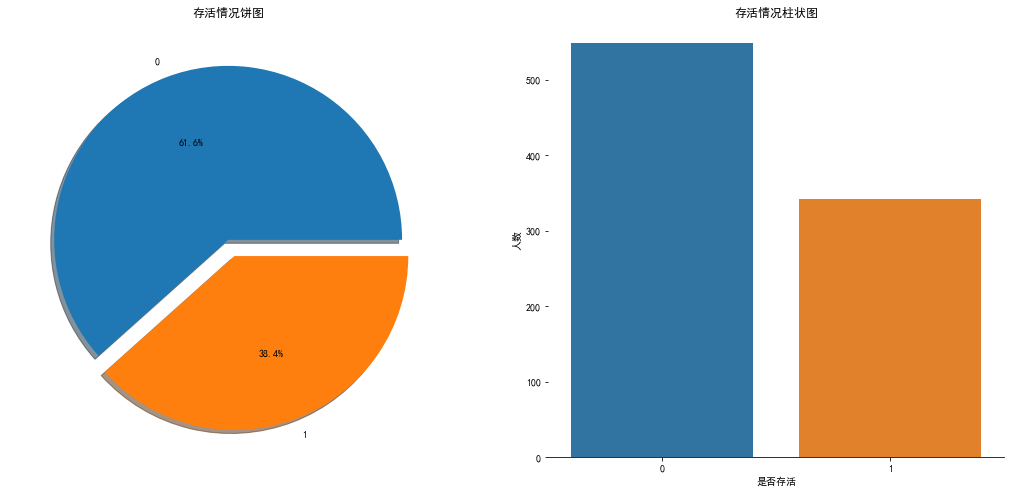

In [6]:
f,ax = plt.subplots(1,2,figsize=(18,8))
titanic_df['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('存活情况饼图')
ax[0].set_ylabel('')

# 去掉上面、右边和左边的边框
sns.despine(left=True)
sns.countplot('survived', data=titanic_df, ax=ax[1])
ax[1].set_title('存活情况柱状图')
ax[1].set_xlabel('是否存活')
ax[1].set_ylabel('人数')
plt.show()

整个数据集中只有38.4％幸免于难，即所有的 891 名乘客中，只有 342 名幸存者。

## 各变量对是否生存影响

Text(0.5, 0.05, '图1 生存与变量关系图\n（a）生存与身份和船舱等级柱状图     （b）生存与船费小提琴图')

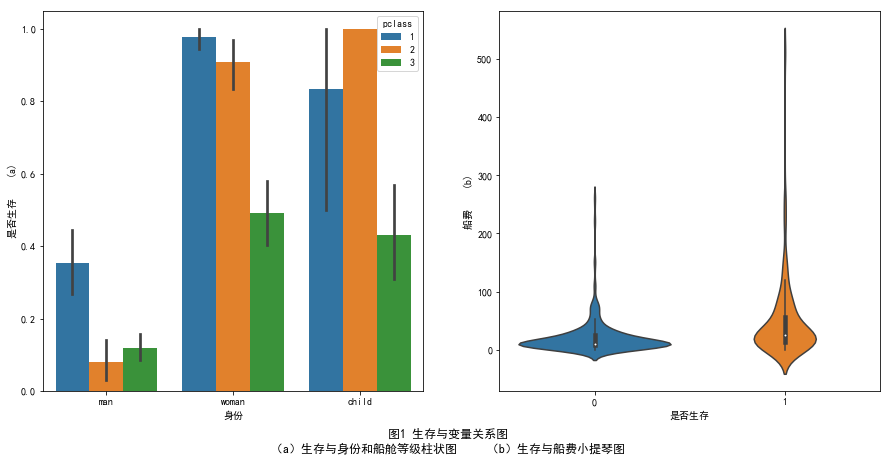

In [9]:
fig, ax= plt.subplots(figsize = (15, 7), nrows=1, ncols=2)
ax_price = sns.barplot(data = titanic_df, x='who', y='survived', hue="pclass", ax=ax[0])
ax_price.set_xlabel('身份') # x轴标签
ax_price.set_ylabel('是否生存    (a)') 
ax_price.tick_params(axis='both') # y轴刻度大小
ax_price.set_title('') 

ax_price = sns.violinplot(data = titanic_df, x='survived', y='fare', ax=ax[1])
ax_price.set_xlabel('是否生存') # x轴标签
ax_price.set_ylabel('船费    (b)') 
ax_price.tick_params(axis='both') # y轴刻度大小
ax_price.set_title('') # 设置标题
fig.suptitle("图1 生存与变量关系图\n（a）生存与身份和船舱等级柱状图     （b）生存与船费小提琴图", 
            x = 0.5, y = 0.05)

# 特征工程

## 缺失值填补

In [10]:
titanic_df['age'].fillna(titanic_df['age'].median(),inplace=True)
titanic_df['embarked'].fillna('S',inplace=True)

## 数据类型转换

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived    891 non-null int64
pclass      891 non-null int64
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    891 non-null object
who         891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
# 字符型转为数值型
dummyColumns = [
    'pclass', 'embarked', 'who'
]

titanic_df = pd.get_dummies(titanic_df, drop_first=True, prefix=dummyColumns, columns=dummyColumns)

In [14]:
titanic_df.head()

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,embarked_Q,embarked_S,who_man,who_woman
0,0,22.0,1,0,7.2500,0,1,0,1,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,26.0,0,0,7.9250,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,1
4,0,35.0,0,0,8.0500,0,1,0,1,1,0


# 模型构建

## 划分数据集

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train, test = train_test_split(titanic_df, test_size=0.3, random_state=0, stratify=titanic_df['survived'])
X_train = train[train.columns[1:]]
y_train = train[train.columns[:1]]
X_test = test[test.columns[1:]]
y_test = test[test.columns[:1]]

## 逻辑斯谛回归

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 
#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
 
lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)
 
grid.cv_results_

{'mean_fit_time': array([0.00245557, 0.00199561, 0.00339074, 0.00299473, 0.00219522,
        0.00122042, 0.00313268, 0.00318294, 0.00313482, 0.00661707,
        0.00312338, 0.        , 0.00054111, 0.        ]),
 'std_fit_time': array([5.68112535e-04, 3.45632940e-06, 1.51014657e-03, 1.08281514e-03,
        3.97270708e-04, 1.44545737e-03, 6.26535416e-03, 6.36587143e-03,
        6.26964569e-03, 8.12284821e-03, 6.24675751e-03, 0.00000000e+00,
        1.08222961e-03, 0.00000000e+00]),
 'mean_score_time': array([0.00134716, 0.00119257, 0.00140185, 0.00159264, 0.00139709,
        0.00039196, 0.00319738, 0.00328636, 0.        , 0.        ,
        0.00024595, 0.00322843, 0.00331206, 0.00329499]),
 'std_score_time': array([0.00070956, 0.0003999 , 0.00048479, 0.00048717, 0.00048924,
        0.00048021, 0.00639477, 0.00619922, 0.        , 0.        ,
        0.00049191, 0.00645685, 0.00662413, 0.00658998]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

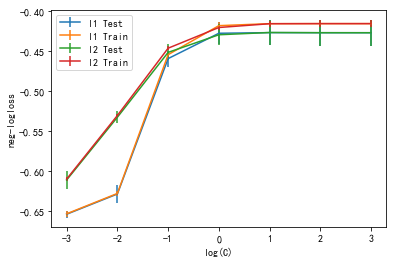

In [22]:
# 绘制plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]

# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)
 
x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    plt.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
plt.savefig('LogisticGridSearchCV_C.png' )
 
plt.show()

In [23]:
print(-grid.best_score_)
print(grid.best_params_)

0.4267914861106197
{'C': 10, 'penalty': 'l2'}


## 模型评估

In [27]:
import sklearn

best_lr = grid.best_estimator_.fit(X_train, y_train)

best_lr.coef_

array([[-0.02206753, -0.49850922, -0.13162412,  0.0036286 , -0.83060038,
        -2.00989676, -0.31052934, -0.29933812, -2.65594896,  0.51330365]])

In [28]:
best_lr.intercept_

array([3.06552699])

In [29]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred=best_lr.predict(X_test))

0.8283582089552238

In [30]:
sklearn.metrics.precision_score(y_true=y_test, y_pred=best_lr.predict(X_test))

0.8433734939759037

In [31]:
sklearn.metrics.recall_score(y_true=y_test, y_pred=best_lr.predict(X_test))

0.6796116504854369

In [32]:
sklearn.metrics.f1_score(y_true=y_test, y_pred=best_lr.predict(X_test))

0.7526881720430108